In [2]:
#Name: Lu Liang
#Github Username: ansleung
#USC ID: 1869015722

In [3]:
#1. Vertebral Column Data Set

In [4]:
#(a) Download the Vertebral Column Data Set

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, DistanceMetric, accuracy_score
from sklearn.neighbors import KNeighborsClassifier 

In [6]:
#(b) Pre-Processing and Exploratory data analysis

In [7]:
Names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", 
         "sacral_slope", "pelvic_radius", "grade_of_spondylolisthesis", "class_label"]
PATH = '../ansleyleung/data/vertebral_column_data/column_2C.dat'

# read csv file and create dataframe
df = pd.read_csv(PATH, header = None, delimiter = " ")
df.columns = Names
df

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_of_spondylolisthesis,class_label
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [8]:
#i.Make scatterplots of the independent variables in the dataset. Use color to show Classes 0 and 1.

/Users/ansleyleung/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.1, 'Scatterplots of all independent variables')

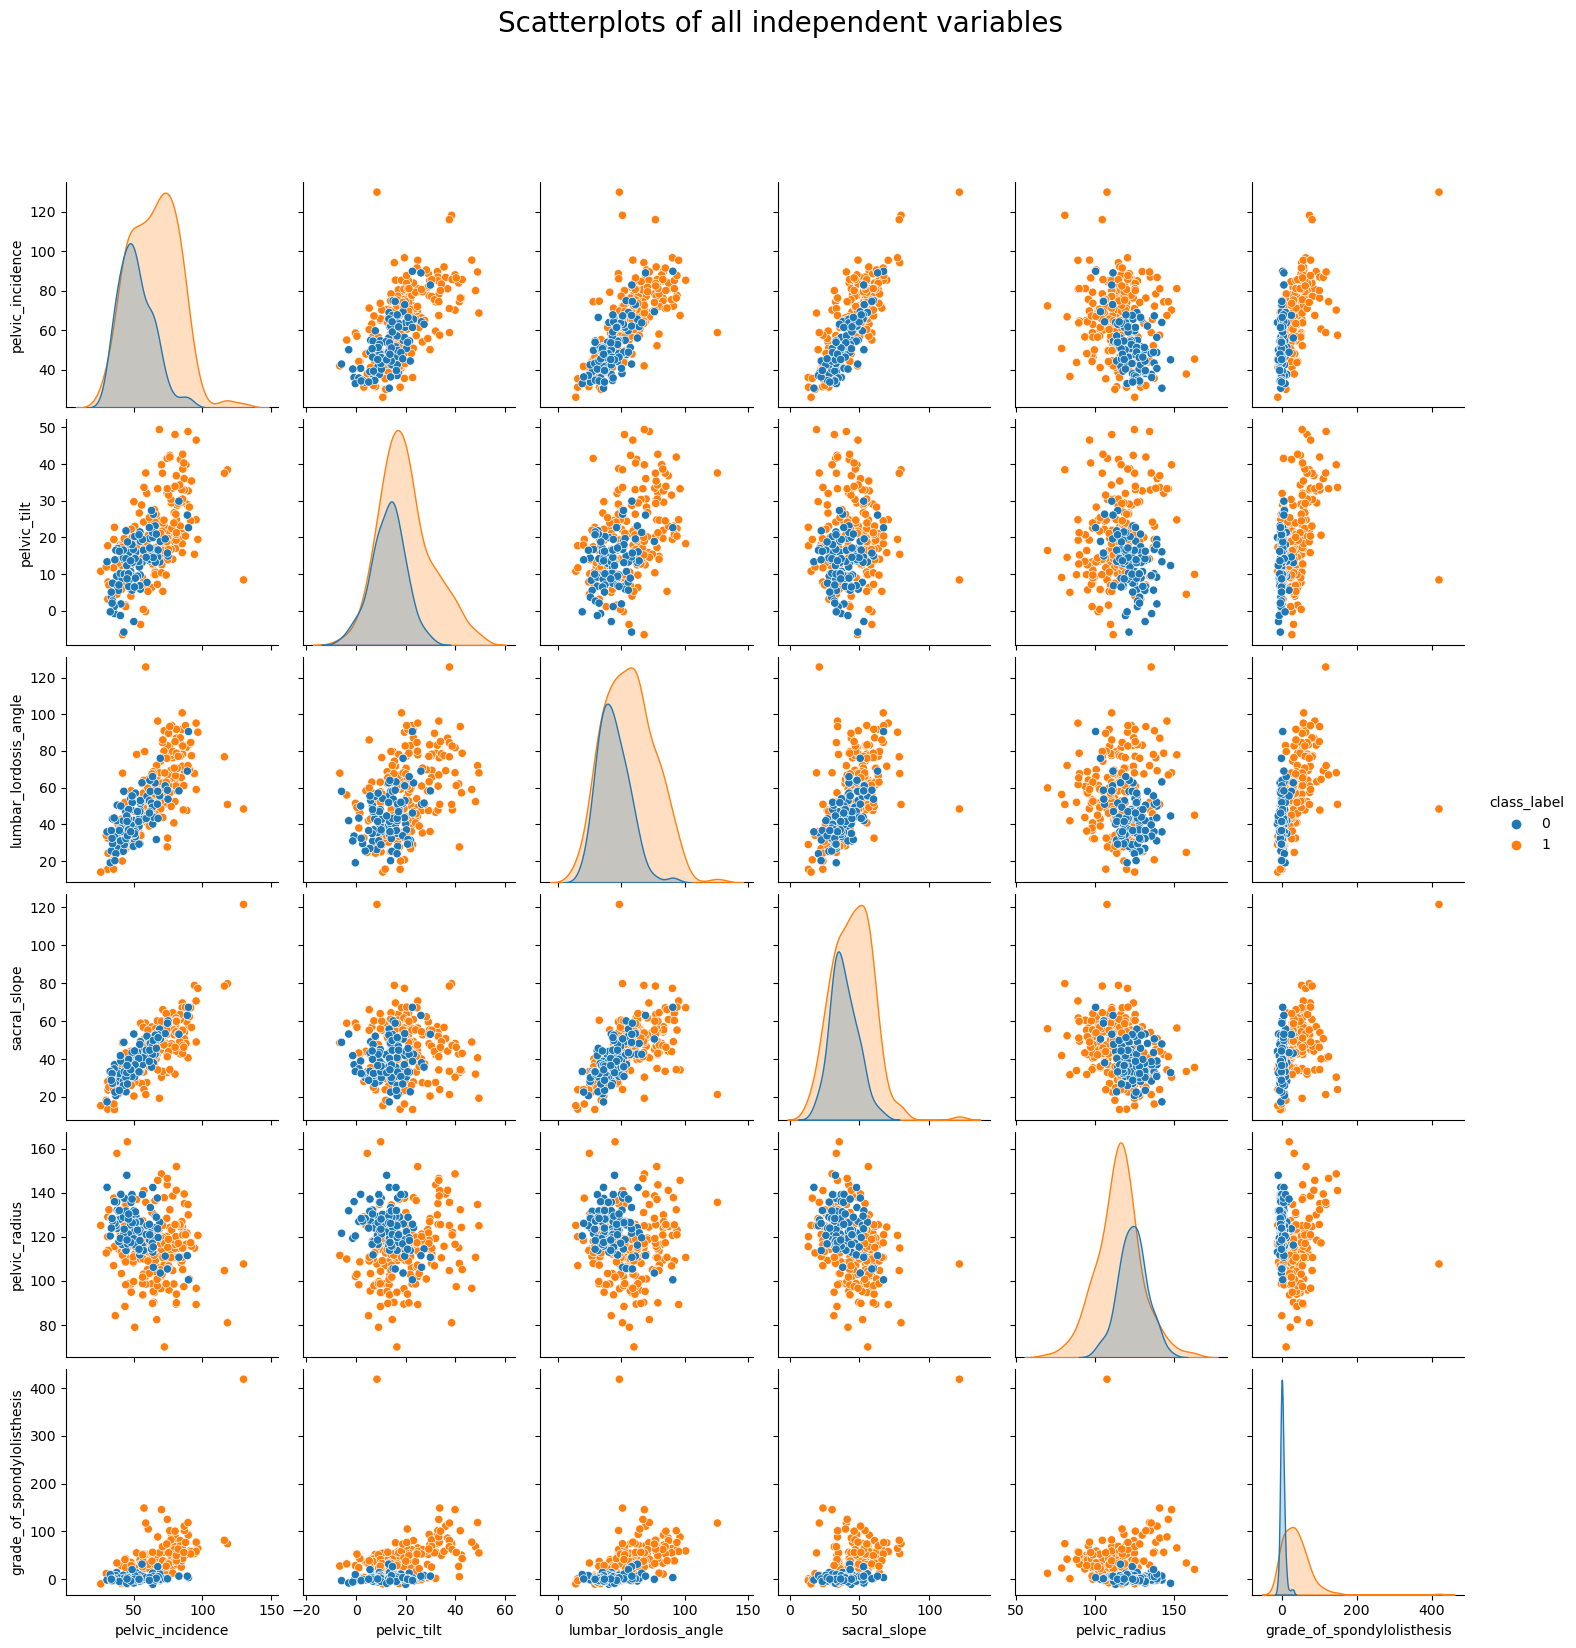

In [9]:
#redifining class labels to 0 and 1 instead of NO and AB.
#reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.htmlshai how hot transit yes what why no no laughing pique Wolf what is it anybody want to work
df.class_label.replace(['NO', 'AB'], [0, 1], inplace = True)

#create scatterplots of all independent variables
scatterplot = sns.pairplot(data = df, hue = "class_label", diag_kind="kde")
scatterplot.fig.suptitle("Scatterplots of all independent variables", x = 0.5, y = 1.1, fontsize = 20)

In [10]:
#ii. Make boxplots for each of the independent variables. Use color to show Classes 0 and 1 (see ISLR p. 129).

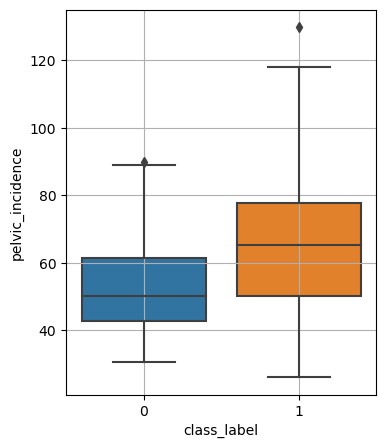

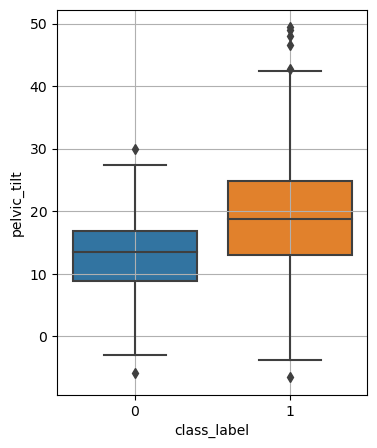

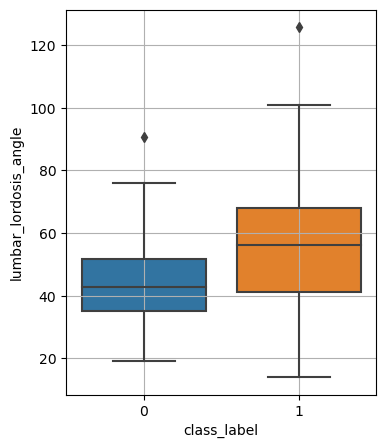

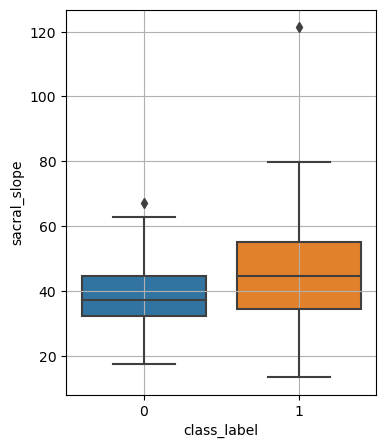

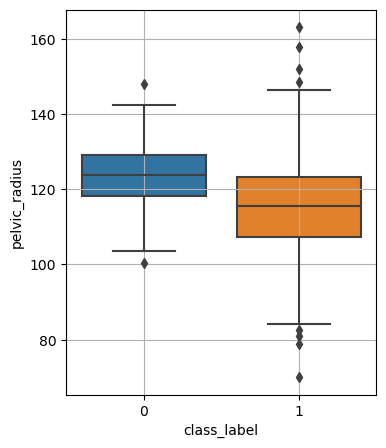

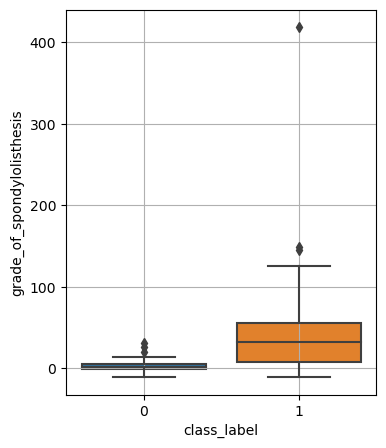

In [11]:
#there are five independent variables.
for x in range(len(Names) - 1):
    plt.figure(figsize = (4, 5))
    sns.boxplot(data = df, x = "class_label", y = Names[x])
    plt.grid(True)
    plt.show() 

In [12]:
#iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the training set and the rest of the data as the test set.

In [13]:
# bifurcating dataset into training and testing dataset
#reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
training_set = pd.concat([df[df["class_label"] == 0].iloc[0:70, :], 
                          df[df["class_label"] == 1].iloc[0:140, :]])
testing_set = pd.concat([df[df["class_label"] == 0].iloc[70:, :], 
                         df[df["class_label"] == 1].iloc[140:, :]])

print("The training set has shape", training_set.shape)
print("The testing set has shape", testing_set.shape)

The training set has shape (210, 7)
The testing set has shape (100, 7)


In [14]:
#(c) Classification using KNN on Vertebral Column Data Set

In [15]:
#i. Write code for k-nearest neighbors with Euclidean metric (or use a software package).

In [16]:
# splitting training dataset and testing data into features and labels
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
training_feature = training_set.iloc[:, 0:(len(Names) - 1)].values
training_label = training_set.iloc[:, (len(Names) - 1)].values
testing_feature = testing_set.iloc[:, 0:(len(Names) - 1)].values
testing_label = testing_set.iloc[:, (len(Names) - 1)].values

#references:https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
new_model = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', p = 2, metric = 'euclidean')
new_model.fit(training_feature, training_label)

KNeighborsClassifier(metric='euclidean')

In [17]:
#(c)ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k fork 2 f208; 205; : : : ; 7; 4; 1; g (in reverse order). You are welcome to use smallerincrements of k. Which k  is the most suitable k among those values? Cal-culate the confusion matrix, true positive rate, true negative rate, precision,and F1-score when k = k .2

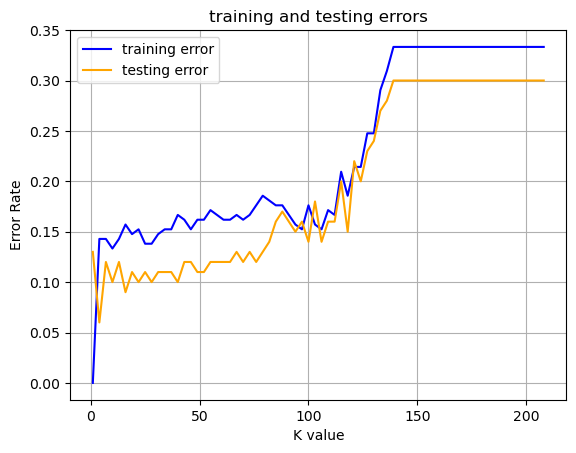

k =  4 is the most suitable k among the values.
Confusion Matrix:
 [[25  5]
 [ 1 69]]
True Positive Rate: 0.99
True Negative Rate: 0.83
Precision: 0.93
F1-score: 0.96


In [18]:
training_error_list = list()
testing_error_list = list()
best_k_value = 0
min_error = float("inf")

#compute predictions for testing data to evaluate the model's performance
predictions = {} 
for k in range(208, 0, -3):
    classifier = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', p = 2, metric = 'euclidean')
    classifier.fit(training_feature, training_label)
    predictions[k] = classifier.predict(testing_feature)
   
    # error = 1 - accuracy score
    #reference: sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    training_error = 1 - accuracy_score(training_label, classifier.predict(training_feature), normalize = True)
    testing_error = 1 - accuracy_score(testing_label, predictions[k], normalize = True)
    training_error_list.append(training_error)
    testing_error_list.append(testing_error)
    
    #use the loop to find the new min_error and best k value
    if testing_error < min_error:
        min_error = testing_error
        best_k_value = k

# Plot train and test errors in reverse order
k = range(208, 0, -3)

ax = plt.gca()
plt.title('training and testing errors')
ax.set_xlabel('K value')
ax.set_ylabel('Error Rate')
ax.plot(k, training_error_list, label = 'training error', color = 'blue')
ax.plot(k, testing_error_list, label = 'testing error', color = 'orange')
plt.legend()
plt.grid(True)
plt.show()

print("k = ", best_k_value, "is the most suitable k among the values.")

#Calculate the confusion matrix, true positive rate, true negative rate, precision and F1-score when k = k*
classifier_with_best_k = KNeighborsClassifier(n_neighbors = best_k_value, weights = 'uniform', p = 2, metric = 'euclidean')
classifier_with_best_k.fit(training_feature, training_label)
predict_label = classifier_with_best_k.predict(testing_feature)

confusion_mat = confusion_matrix(testing_label, predict_label)
print("Confusion Matrix:\n", confusion_mat)

TN, FP, FN, TP = confusion_mat.ravel()

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)
P = TP / (TP + FP)
R = TP /(TP+FN)
F1_Score = 2 * (P * R)/(P + R)

print("True Positive Rate:", round(TPR, 2))
print("True Negative Rate:", round(TNR, 2))
print("Precision:", round(P, 2))
print("F1-score:", round(F1_Score, 2))

In [19]:
#(c)iii Plot learning curve with different traning size n

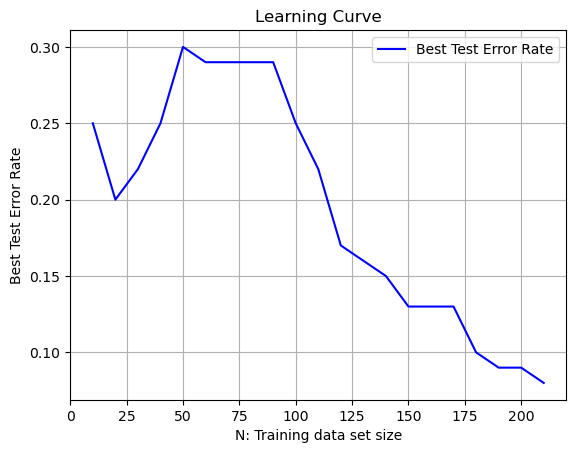

In [20]:
best_k_list = list()
best_error_list = list()

N_values = range(10, 211, 10)
for N in N_values:
    # truncate train set
    t_train_set = pd.concat([training_set[training_set["class_label"] == 0].iloc[0: N // 3, :], 
                                    training_set[training_set["class_label"] == 1].iloc[0: N - N // 3, :]],
                                    ignore_index = True)
    
    t_training_feature = t_train_set.iloc[: ,0:len(Names) - 1].values
    t_training_label = t_train_set.iloc[: ,len(Names) - 1].values
    
    best_error = float("inf")
    best_k_value = 0
    predictions = {}
    
    for k in range(1, N, 5):
        classifier = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', p = 2, metric = 'euclidean')
        classifier.fit(t_training_feature, t_training_label)
        predictions[k] = classifier.predict(testing_feature)

        t_training_error = 1 - accuracy_score(testing_label, predictions[k], normalize = True)
        
        if (t_training_error < best_error):
            best_error = t_training_error
            best_k_value = k
    
    best_k_list.append(best_k_value)
    best_error_list.append(best_error)

#plot the learning curve
ax = plt.gca()
plt.title('Learning Curve')
ax.set_xlabel('N: Training data set size')
ax.set_ylabel('Best Test Error Rate')
ax.plot(N_values, best_error_list, label = 'Best Test Error Rate', color = 'blue')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.show()

In [21]:
#i.A. Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k ) in a table. Use all of your training data and select the best k when f1; 6; 11; : : : ; 196g.

In [22]:
k_values = range(1, 200, 5)
best_ks = list()
min_error = float("inf")
predictions = {}

#Manhattan distance: p = 1
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', p = 1, metric = 'minkowski')
    classifier.fit(training_feature, training_label)
    predictions[k] = classifier.predict(testing_feature)

    error_rate = 1 - accuracy_score(testing_label, predictions[k])

    if error_rate < min_error:
        min_error = error_rate
        best_ks = [k] 
    elif error_rate == min_error:
        best_ks.append(k)

print("Metric\t\tBest k\t\tTest Error")
print("-" * 42)
for k in best_ks:
    print(f"Manhattan(p=1)\t{k}\t\t{round(min_error, 2)}")

Metric		Best k		Test Error
------------------------------------------
Manhattan(p=1)	6		0.11
Manhattan(p=1)	11		0.11
Manhattan(p=1)	26		0.11


In [23]:
#i.B.with log10(p) 2 f0:1; 0:2; 0:3; : : : ; 1g. In this case, use the k  you found for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [24]:
best_manhattan = min(best_ks)

log10_p_values = np.arange(0.1, 1.1, 0.1)
best_p = 0
min_error = float("inf")
result = list()
predictions = {}

for log10_p in log10_p_values:
    p = 10 ** log10_p
    classifier = KNeighborsClassifier(n_neighbors = best_manhattan, weights = 'uniform', p = p, metric='minkowski')
    classifier.fit(training_feature, training_label)
    
    predictions[k] = classifier.predict(testing_feature)
    error_rate = 1 - accuracy_score(testing_label, predictions[k])
    
    if error_rate < min_error:
        min_error = error_rate
        best_p = log10_p
        
    result.append((log10_p, error_rate))

print("log10(p)\tTest Error")
print("-" * 26)

for log10_p, error_rate in result:
    print(f"{round(log10_p, 2)}\t\t{round(error_rate, 2)}")

print(f"The best log10(p) is: {round(best_p, 2)} with a test error of: {round(min_error, 2)} when p = {best_manhattan}.")

log10(p)	Test Error
--------------------------
0.1		0.09
0.2		0.09
0.3		0.08
0.4		0.08
0.5		0.08
0.6		0.06
0.7		0.07
0.8		0.08
0.9		0.09
1.0		0.09
The best log10(p) is: 0.6 with a test error of: 0.06 when p = 6.


In [25]:
#i.C.which becomes Chebyshev Distance with p to infinity

In [26]:
k_values = range(1, 200, 5)
best_ks = list()
min_error = float("inf")
predictions = {}

for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', p = p, metric = 'chebyshev')
    classifier.fit(training_feature, training_label)
    predictions[k] = classifier.predict(testing_feature)

    # Making predictions and evaluating error
    predicted_labels = classifier.predict(testing_feature)
    error_rate = 1 - accuracy_score(testing_label, predictions[k])

    # Tracking the best k and corresponding error
    if error_rate < min_error:
        min_error = error_rate
        best_ks = [k] 
    elif error_rate == min_error:
        best_ks.append(k)
        
print('Metric\t\tBest K\t\tTest Error')
print("-" * 42)
print(f"Chebyshev\t{best_ks[0]}\t\t{round(min_error, 2)}")

Metric		Best K		Test Error
------------------------------------------
Chebyshev	16		0.08


In [27]:
#ii.Mahalanobis Distance

In [28]:
k_values = range(1, 200, 5) 
best_ks = list()
min_error = float("inf")
predictions = {}

# Compute the inverse of the covariance matrix
#reference: https://numpy.org/doc/stable/reference/generated/numpy.cov.html
#reference: https://www.geeksforgeeks.org/compute-the-inverse-of-a-matrix-using-numpy/
cov_matrix = np.cov(training_feature, rowvar = False, bias = False)
inv = np.linalg.pinv(cov_matrix)

#reference: https://stackoverflow.com/questions/34643548/how-to-use-mahalanobis-distance-in-sklearn-distancemetrics
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors = k, weights = 'uniform', p = p, metric = 'mahalanobis', metric_params = {'VI': inv})
    classifier.fit(training_feature, training_label)
    predictions[k] = classifier.predict(testing_feature)
    error_rate = 1 - accuracy_score(testing_label, predictions[k])

    # Tracking the best k and corresponding error
    if error_rate < min_error:
        min_error = error_rate
        best_ks = [k]
    elif error_rate == min_error:
        best_ks.append(k)

print("Metric\t\tBest k\t\tTest Error")
print("-" * 42)
for k in best_ks:
    print(f"Mahalanobis\t{k}\t\t{round(min_error, 2)}")

Metric		Best k		Test Error
------------------------------------------
Mahalanobis	1		0.17
Mahalanobis	6		0.17


In [29]:
#(e).The majority polling decision can be replaced by weighted decision, in which the weight of each point in voting is inversely proportional to its distance from thequery/test data point. In this case, closer neighbors of a query point will havea greater inuence than neighbors which are further away. Use weighted votingwith Euclidean, Manhattan, and Chebyshev distances and report the best testerrors when k 2 f1; 6; 11; 16; : : : ; 196g.

In [30]:
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
min_error = {}
best_ks = {}
predictions = {}

for metric in distance_metrics:
    best_ks[metric] = list()
    min_error[metric] = float("inf")

    for k in range(1, 200, 5):
        classifier = KNeighborsClassifier(n_neighbors = k, p = p, weights = 'distance', metric = metric)
        classifier.fit(training_feature, training_label)
        predictions[k] = classifier.predict(testing_feature)
        
        testing_error = 1 - accuracy_score(testing_label, predictions[k])
        if testing_error < min_error[metric]:
            min_error[metric] = testing_error
            best_ks[metric] = [k]
        elif testing_error == min_error[metric]:
            best_ks[metric].append(k)

print("Metric\t\tBest k\t\tMin Test Error")
print("-" * 46)
for metric in distance_metrics:
    print(f"{metric.capitalize()}\t{best_ks[metric]}\t\t{round(min_error[metric], 2)}")


Metric		Best k		Min Test Error
----------------------------------------------
Euclidean	[6]		0.1
Manhattan	[26]		0.1
Chebyshev	[16, 31, 36, 41, 61]		0.11


In [31]:
#(f). What is the lowest training error rate you achieved in this homework?
#The lowest training error rate is 0 when k = 1.